# Tissue Classification using Neural Networks
In this lab we will explore the use of texture in images and traditional machine learning approaches such as clustering. The dataset we will be using is available here: http://dx.doi.org/10.5281/zenodo.53169. 

![alt text](https://www.researchgate.net/profile/Jakob_Kather/publication/303998214/figure/fig7/AS:391073710002224@1470250646407/Representative-images-from-our-dataset-Here-the-first-10-images-of-every-tissue-class.png)

The above figure shows the 8 different classes of tissue we will be trying to identify. 

In [0]:
# Imports
from __future__ import print_function
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

## Step 1
* Load the data (done for you)
 * The "data" variable stores 5000 images of shape 150x150. This means data has shape (5000, 150, 150). These images are loaded here as grayscale.
 * The "labels" variable stores 5000 labels (0-7). This means "labels" has shape (5000,)
* Split data into training and testing subsets (left up to you)
 * Check out the sklearn function train_test_split from sklearn.model_selection

In [2]:
! git clone https://github.com/BeaverWorksMedlytics/Week3_public.git

# Build the path to the data folder. No need to change directories
# There are a total of 6 files you will have to load
data_dir = os.path.join( os.getcwd(), 'Week3_public', 'data', 'crc')

fatal: destination path 'Week3_public' already exists and is not an empty directory.


In [3]:
# Load data and split into training, testing sets
y = np.load(os.path.join(data_dir, 'rgb01.npz'))
labels = y['labels']
data = y['rgb_data']
data = data[:,:,:,0]
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data.shape)
for ii in range(2,6):
    filename = os.path.join(data_dir, 'rgb0' + str(ii) + '.npz')
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'], axis=0)
    data = np.append(data, y['rgb_data'][:,:,:,0], axis=0)
    print(data.shape)
    y = []


print( data.shape )
print( labels.shape )

(1000, 150, 150)
loading  /content/Week3_public/data/crc/rgb02.npz
(2000, 150, 150)
loading  /content/Week3_public/data/crc/rgb03.npz
(3000, 150, 150)
loading  /content/Week3_public/data/crc/rgb04.npz
(4000, 150, 150)
loading  /content/Week3_public/data/crc/rgb05.npz
(5000, 150, 150)
(5000, 150, 150)
(5000,)


In [0]:
num_images, nrows, ncols = data.shape

# convert the labels from 1-D arrays to categorical type 
labels = to_categorical(labels)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state = 0)

## Normalize and Reshape Data
All images should be normalized to the range 0-1 by dividing by 255.

Additionally, because this is a ANN, not a CNN, we need to reshape the data to be one dimensional. In training and test data, colapse the row and column dimensions into one dimension using reshape().
#### Note
* Using the La\*b colorspace : If you convert your images to the La\*b colorspace, the scaling factor will change. Each channel in this colorspace will have a different range and normalization of each space will involve scaling each channel separately. Additionally, the a\* channel can have a negative range. This also needs to be taken into account. 
* Using the HSV/HSI colorspace : Similar considerations apply if you are using the HSV/HSI colorspace. The only difference is that the HSV/HSI colorspace will have all positive values.

In [5]:
# Assuming we are using the RGB colorspace
# Normalize all images so that they are 0-1

num_images, nrows, ncols = X_train.shape
X_train = X_train.astype('float')/255
X_train = X_train.reshape(num_images,nrows*ncols)

num_images2, nrows2, ncols2 = X_test.shape
X_test = X_test.astype('float')/255
X_test = X_test.reshape(num_images2,nrows2*ncols2)

print(X_train.shape)

(3750, 22500)


## Step 2
At this point, the data has been split into training and testing sets and normalized. We will now design a fully connected neural network for texture classification. 

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="50%"></img>

( Image from http://cs231n.github.io/convolutional-networks/ )

When designing a fully connected network for classification, we have several decisions to make.

**Network Architecuture**
* How many layers will our network have ?
* How many neurons per layer ?
* What is an appropriate batch size, learning rate and number of training epochs ?

**Data input**
* Do we use the raw data ?
    * RGB or just gray channel ?
* Does the use of different colorspaces lead to better results for a given network architecture ?
* Can we use any of the texture features from the previous lab as inputs to this model ?
* How does data augmentation affect the results ? 

Other considerations, we will not be exploring :
* What is the trade-off between input data sizes and batch size ?
* Is the GPU always the appropriate platform for training ?
* How does hardware influence inputs and batch sizes for a given desired accuracy ?

In [0]:
# Define the data shapes based on your decision to use rgb or grayscale or other colorpsaces or texture features or 
# some combination of these inputs
num_classes = 8 
input_shape = nrows*ncols

## Step 3
Design your network here using Keras

In [7]:
# Create your network
model = []
model = Sequential()

model.add(Dense(128, activation="relu", input_shape = (input_shape,)))

# Add fully connected layers 
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))

# See Dense : https://keras.io/layers/core/#dense

# Add final output layer - This should have as many neurons as the number
# of classes we are trying to identify
model.add(Dense(8, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2880128   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 1032      
Total params: 3,702,280
Trainable params: 3,702,280
Non-trainable params: 0
_________________________________________________________________


## Step 4
Compile the model you designed. Compiltation of the Keras model results in the initialization of model weights and sets other model properties.

In [8]:
from tensorflow.train import AdamOptimizer
import keras
model.compile(optimizer=AdamOptimizer(0.0001), loss=keras.losses.categorical_crossentropy, metrics = ['accuracy'] )

Using TensorFlow backend.


## Step 5
Train model

In [9]:
y = model.fit(X_train, y_train, epochs=100, batch_size=600, verbose=1 )

Epoch 1/100
3750/3750 [==============================] - 3s 761us/step - loss: 2.0612 - acc: 0.1293
Epoch 2/100
3750/3750 [==============================] - 2s 470us/step - loss: 2.0490 - acc: 0.1216
Epoch 3/100
3750/3750 [==============================] - 2s 470us/step - loss: 2.0421 - acc: 0.1259
Epoch 4/100
3750/3750 [==============================] - 2s 467us/step - loss: 2.0445 - acc: 0.1248
Epoch 5/100
3750/3750 [==============================] - 2s 470us/step - loss: 2.0417 - acc: 0.1211
Epoch 6/100
3750/3750 [==============================] - 2s 472us/step - loss: 2.0374 - acc: 0.1245
Epoch 7/100
3750/3750 [==============================] - 2s 471us/step - loss: 2.0310 - acc: 0.1227
Epoch 8/100
3750/3750 [==============================] - 2s 469us/step - loss: 2.0298 - acc: 0.1227
Epoch 9/100
3750/3750 [==============================] - 2s 473us/step - loss: 2.0289 - acc: 0.1387
Epoch 10/100
3750/3750 [==============================] - 2s 472us/step - loss: 2.0269 - acc: 0.1232

3750/3750 [==============================] - 2s 473us/step - loss: 2.0000 - acc: 0.1352
Epoch 17/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.9869 - acc: 0.1533
Epoch 18/100
3750/3750 [==============================] - 2s 469us/step - loss: 1.9753 - acc: 0.1533
Epoch 19/100
3750/3750 [==============================] - 2s 460us/step - loss: 1.9677 - acc: 0.1853
Epoch 20/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.9607 - acc: 0.1752
Epoch 21/100
3750/3750 [==============================] - 2s 480us/step - loss: 1.9563 - acc: 0.2109
Epoch 22/100
3750/3750 [==============================] - 2s 473us/step - loss: 1.9405 - acc: 0.2355
Epoch 23/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.9126 - acc: 0.2800
Epoch 24/100
3750/3750 [==============================] - 2s 468us/step - loss: 1.8710 - acc: 0.2741
Epoch 25/100
3750/3750 [==============================] - 2s 467us/step - loss: 1.8452 - acc: 0.2901
Epo

3750/3750 [==============================] - 2s 466us/step - loss: 2.0446 - acc: 0.2309
Epoch 32/100
3750/3750 [==============================] - 2s 474us/step - loss: 2.0161 - acc: 0.1787
Epoch 33/100
3750/3750 [==============================] - 2s 467us/step - loss: 1.9401 - acc: 0.2085
Epoch 34/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.8783 - acc: 0.2173
Epoch 35/100
3750/3750 [==============================] - 2s 472us/step - loss: 1.8323 - acc: 0.2437
Epoch 36/100
3750/3750 [==============================] - 2s 467us/step - loss: 1.7858 - acc: 0.2629
Epoch 37/100
3750/3750 [==============================] - 2s 470us/step - loss: 1.7495 - acc: 0.2789
Epoch 38/100
3750/3750 [==============================] - 2s 468us/step - loss: 1.7139 - acc: 0.3200
Epoch 39/100
3750/3750 [==============================] - 2s 463us/step - loss: 1.6891 - acc: 0.3056
Epoch 40/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.6767 - acc: 0.3496
Epo

3750/3750 [==============================] - 2s 469us/step - loss: 1.5749 - acc: 0.3475
Epoch 47/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.5313 - acc: 0.4053
Epoch 48/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.4983 - acc: 0.4243
Epoch 49/100
3750/3750 [==============================] - 2s 466us/step - loss: 1.4597 - acc: 0.4603
Epoch 50/100
3750/3750 [==============================] - 2s 468us/step - loss: 1.4334 - acc: 0.4400
Epoch 51/100
3750/3750 [==============================] - 2s 465us/step - loss: 1.4029 - acc: 0.4939
Epoch 52/100
3750/3750 [==============================] - 2s 469us/step - loss: 1.3837 - acc: 0.4741
Epoch 53/100
3750/3750 [==============================] - 2s 472us/step - loss: 1.3947 - acc: 0.4453
Epoch 54/100
3750/3750 [==============================] - 2s 473us/step - loss: 1.4235 - acc: 0.4565
Epoch 55/100
3750/3750 [==============================] - 2s 475us/step - loss: 1.4381 - acc: 0.4064
Epo

3750/3750 [==============================] - 2s 469us/step - loss: 1.3428 - acc: 0.4557
Epoch 62/100
3750/3750 [==============================] - 2s 471us/step - loss: 1.3113 - acc: 0.4851
Epoch 63/100
3750/3750 [==============================] - 2s 471us/step - loss: 1.2886 - acc: 0.4851
Epoch 64/100
3750/3750 [==============================] - 2s 470us/step - loss: 1.2656 - acc: 0.4995
Epoch 65/100
3750/3750 [==============================] - 2s 470us/step - loss: 1.2264 - acc: 0.5464
Epoch 66/100
3750/3750 [==============================] - 2s 472us/step - loss: 1.2011 - acc: 0.5589
Epoch 67/100
3750/3750 [==============================] - 2s 468us/step - loss: 1.2001 - acc: 0.5480
Epoch 68/100
3750/3750 [==============================] - 2s 471us/step - loss: 1.1801 - acc: 0.5624
Epoch 69/100
3750/3750 [==============================] - 2s 473us/step - loss: 1.1588 - acc: 0.5723
Epoch 70/100
3750/3750 [==============================] - 2s 470us/step - loss: 1.1658 - acc: 0.5531
Epo

3750/3750 [==============================] - 2s 473us/step - loss: 1.1610 - acc: 0.5427
Epoch 77/100
3750/3750 [==============================] - 2s 471us/step - loss: 1.1153 - acc: 0.5904
Epoch 78/100
3750/3750 [==============================] - 2s 485us/step - loss: 1.0815 - acc: 0.6125
Epoch 79/100
3750/3750 [==============================] - 2s 492us/step - loss: 1.0763 - acc: 0.5963
Epoch 80/100
3750/3750 [==============================] - 2s 475us/step - loss: 1.0541 - acc: 0.6053
Epoch 81/100
3750/3750 [==============================] - 2s 474us/step - loss: 1.0742 - acc: 0.5984
Epoch 82/100
3750/3750 [==============================] - 2s 476us/step - loss: 1.1322 - acc: 0.5768
Epoch 83/100
3750/3750 [==============================] - 2s 481us/step - loss: 1.1875 - acc: 0.5243
Epoch 84/100
3750/3750 [==============================] - 2s 475us/step - loss: 1.1666 - acc: 0.5208
Epoch 85/100
3750/3750 [==============================] - 2s 479us/step - loss: 1.1511 - acc: 0.5429
Epo

3750/3750 [==============================] - 2s 476us/step - loss: 1.0286 - acc: 0.6285
Epoch 92/100
3750/3750 [==============================] - 2s 474us/step - loss: 0.9775 - acc: 0.6552
Epoch 93/100
3750/3750 [==============================] - 2s 477us/step - loss: 0.9571 - acc: 0.6469
Epoch 94/100
3750/3750 [==============================] - 2s 479us/step - loss: 0.9529 - acc: 0.6680
Epoch 95/100
3750/3750 [==============================] - 2s 478us/step - loss: 0.9388 - acc: 0.6632
Epoch 96/100
3750/3750 [==============================] - 2s 475us/step - loss: 0.9599 - acc: 0.6568
Epoch 97/100
3750/3750 [==============================] - 2s 481us/step - loss: 0.9168 - acc: 0.6776
Epoch 98/100
3750/3750 [==============================] - 2s 478us/step - loss: 0.9042 - acc: 0.6973
Epoch 99/100
3750/3750 [==============================] - 2s 474us/step - loss: 0.9809 - acc: 0.6283
Epoch 100/100
3750/3750 [==============================] - 2s 482us/step - loss: 0.9504 - acc: 0.6739


## Step 6
See how your model performs by uisng it for inference.
* What is the accuracy of classification ?
* Change your model, re-compile and test. Can you improve the accuracy of the model ?


In [0]:
# predict labels - use the test set for prediction
pred_labels = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

test_labels = y_test
# We need to convert the categorical array test_labels and pred_labels into a vector
# in order to use it in the calculation of the confusion matrix (i.e. convert from one-hot to integers)
mat = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(pred_labels, axis=1))
acc = accuracy_score(np.argmax(test_labels, axis=1), np.argmax(pred_labels, axis=1))
print(acc)
print(mat)

0.4352
[[ 10   2 111   0   0   1   0  31]
 [  1 105  26   5   1   0   2   0]
 [  3   8  98   0   0   4   0  41]
 [  0  58   4  57   5   0  23   0]
 [ 12  21 103   2  10   0  10   5]
 [  0   0   0   0   0 157   0   1]
 [  0  45  17  50   9   0  52   0]
 [  0   0  21   0   0  84   0  55]]


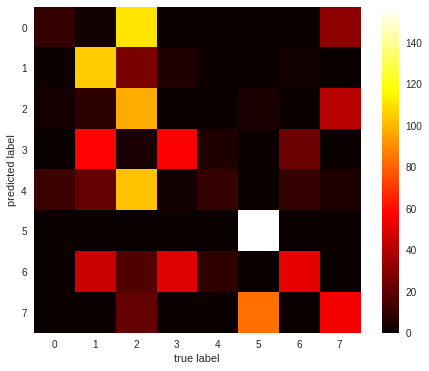

In [12]:
plt.figure(figsize=(8,6))
plt.imshow(mat, cmap='hot', interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Assignment
* In Step 3 design your own network
* Does the model perform better if you use all three RGB channels ?
* How does the performance change when using the La*b colorspace ?


In [13]:

# Load data as RGB
y = np.load(os.path.join(data_dir, 'rgb01.npz'))
labels = y['labels']
data_rgb = y['rgb_data']
label_str = y['label_str']
label_str = label_str.tolist() # this is to convert label_str back to a dictionary
y = []

print(data_rgb.shape)
for ii in range(2,6):
    filename = os.path.join(data_dir, 'rgb0' + str(ii) + '.npz')
    print('loading ', filename)
    y = np.load(filename)
    labels = np.append(labels, y['labels'], axis=0)
    data_rgb = np.append(data_rgb, y['rgb_data'])
    print(data_rgb.shape)
    y = []

data_rgb = data_rgb.astype('float')
data_rgb = data_rgb.reshape(5000, 150, 150, 3)

print( data_rgb.shape )
print( labels.shape )

num_images, nrows, ncols, dims = data_rgb.shape

(1000, 150, 150, 3)
loading  /content/Week3_public/data/crc/rgb02.npz
(135000000,)
loading  /content/Week3_public/data/crc/rgb03.npz
(202500000,)
loading  /content/Week3_public/data/crc/rgb04.npz
(270000000,)
loading  /content/Week3_public/data/crc/rgb05.npz
(337500000,)
(5000, 150, 150, 3)
(5000,)
